# Mapa de IDH-M (índice de Desenvolvimento Humano) brasileiro, usando web scraping

(Adaptado de https://www.kaggle.com/jacquelineandrade/idh-m-brasileiro-web-scraping-mapa)
<br><br>
- Dados IDH Brasil: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_IDH
<br>
- Arquivos GEO extraídos do site do IBGE (referentes ao ano de 2015). 
Fonte: http://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2015/Brasil/BR/

- Arquivo usado: br_unidades_da_federacao.zip


# 1 - Módulos

* Requests: conexão HTTP Wikipédia
* Beautiful Soup: extração do HTML
<br>
* Geopandas: geração (plot) do mapa - https://geopandas.org/

 - Geopandas is a Open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely (https://shapely.readthedocs.io/en/stable/manual.html). Geopandas further depends on fiona (https://pypi.org/project/Fiona/) for file access and matplotlib for plotting.

In [ ]:
# instalação do módulo Geopandas

!pip install geopandas

In [ ]:
# bibliotecas

import requests
from bs4 import BeautifulSoup
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt

# 2 - Importação dos dados e criação dos dataframes

In [ ]:
# Wikipedia sobre o IDH do Brasil

req = requests.get('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_IDH').text

In [ ]:
# criação do soup

soup = BeautifulSoup(req, 'html.parser')

# visualização
# print(soup.prettify())

In [ ]:
# extração da primeira tabela da página do soup
# parâmetro '[0]'

table = soup.find_all('table', class_='wikitable')[0] 

# print(table.prettify())

In [ ]:
# conversão da tabela em uma lista de dataframes
# pd.read_html - Read HTML tables into a list of DataFrame objects (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)

df = pd.read_html(str(table))
print(df)

[              Posição                         ...   IDH-M País comparável[nota 2][2]
   Posição em 2017[1] Comparação com 2016[1]  ... Em 2016 País comparável[nota 2][2]
0                   1                    (0)  ...     854                   Portugal
1                   2                    (0)  ...     831                     Rússia
2                   3                    (0)  ...     805                    Uruguai
3                   4                    (0)  ...     794                   Maurícia
4                   5                    (0)  ...     792                    Albânia
5                   6                    (0)  ...     781                    Geórgia
6                   6                    (0)  ...     783                    Geórgia
7                   8                    (0)  ...     772          Antígua e Barbuda
8                   9                    (0)  ...     770       Bósnia e Herzegovina
9                  10                    (0)  ...     768       

In [ ]:
# primeiro item da lista (o dataframe "Classificação das unidades da federação por IDH-M - 2017")

# pandas.DataFrame.copy - Make a copy of this object’s indices and data (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)

df_1 = df[0].copy()
df_1

Posição                         ...   IDH-M País comparável[nota 2][2]
   Posição em 2017[1] Comparação com 2016[1]  ... Em 2016 País comparável[nota 2][2]
0                   1                    (0)  ...     854                   Portugal
1                   2                    (0)  ...     831                     Rússia
2                   3                    (0)  ...     805                    Uruguai
3                   4                    (0)  ...     794                   Maurícia
4                   5                    (0)  ...     792                    Albânia
5                   6                    (0)  ...     781                    Geórgia
6                   6                    (0)  ...     783                    Geórgia
7                   8                    (0)  ...     772          Antígua e Barbuda
8                   9                    (0)  ...     770       Bósnia e Herzegovina
9                  10                    (0)  ...     768       Bósnia e Herzegovina
10                 11                    (0)  ...     763                     México
11                 12                    (0)  ...     758                    Ucrânia
12                 13                    (1)  ...     737       República Dominicana
13                 14                    (1)  ...     738                    Tunísia
14                 15                    (3)  ...     726                   Mongólia
15                 16                    (4)  ...     716                   Mongólia
16                 17                    (2)  ...     736                     Líbano
17                 18                    (2)  ...     730                    Jamaica
18                 19                    (0)  ...     718                  Venezuela
19                 20                    (1)  ...     709                   Jordânia
20                 21                    (4)  ...     729                   Maldivas
21                 22                    (0)  ...     709                  Filipinas
22                 23                    (0)  ...     700                      Gabão
23                 24                    (0)  ...     693             Ilhas Marshall
24                 25                    (0)  ...     690             Ilhas Marshall
25                 26                    (1)  ...     682                     Iraque
26                 27                    (1)  ...     683                     Iraque

[27 rows x 6 columns]

In [ ]:
# Exclusão das colunas 0, 1 e 5 ("Posição em 2017", "Comparação com 2016" e "País comparável")

df_1 = df_1.drop(df_1.columns[[0,1,5]], axis=1)
df_1

Unidade federativa   IDH-M        
     Unidade federativa Em 2017 Em 2016
0      Distrito Federal     850     854
1             São Paulo     826     831
2        Santa Catarina     808     805
3        Rio de Janeiro     796     794
4                Paraná     792     792
5          Minas Gerais     787     781
6     Rio Grande do Sul     787     783
7           Mato Grosso     774     772
8        Espírito Santo     772     770
9                 Goiás     769     768
10   Mato Grosso do Sul     766     763
11              Roraima     752     758
12            Tocantins     743     737
13                Amapá     740     738
14                Ceará     735     726
15             Amazonas     733     716
16  Rio Grande do Norte     731     736
17           Pernambuco     727     730
18             Rondônia     725     718
19              Paraíba     722     709
20                 Acre     719     729
21                Bahia     714     709
22              Sergipe     702     700
23                 Pará     698     693
24                Piauí     697     690
25             Maranhão     687     682
26              Alagoas     683     683

In [ ]:
# Alterando o nome das colunas

df_1.columns = ['UF', 'IDH-M 2017', 'IDH-M 2016']
df_1

,UF,IDH-M 2017,IDH-M 2016
0,Distrito Federal,850,854
1,São Paulo,826,831
2,Santa Catarina,808,805
3,Rio de Janeiro,796,794
4,Paraná,792,792
5,Minas Gerais,787,781
6,Rio Grande do Sul,787,783
7,Mato Grosso,774,772
8,Espírito Santo,772,770
9,Goiás,769,768


In [ ]:
# Coluna 'UF' em maiúsculas, igual ao geodataframe

df_1['UF'] = df_1['UF'].str.upper()
df_1

,UF,IDH-M 2017,IDH-M 2016
0,DISTRITO FEDERAL,850,854
1,SÃO PAULO,826,831
2,SANTA CATARINA,808,805
3,RIO DE JANEIRO,796,794
4,PARANÁ,792,792
5,MINAS GERAIS,787,781
6,RIO GRANDE DO SUL,787,783
7,MATO GROSSO,774,772
8,ESPÍRITO SANTO,772,770
9,GOIÁS,769,768


In [ ]:
# Importando o geodataframe com o mapa do Brasil dividido em estados

# SHG -  dados geoespaciais em forma de vetor usado por Sistemas de Informações Geográficas também conhecidos como SIG.
# Foi desenvolvido e regulamentado pela ESRI como uma especificação aberta para interoperabilidade por dados entre os softwares de Esri e de outros fornecedores

# Mais informações sobre polígonos e multipolígonos: 
# https://gis.stackexchange.com/questions/225368/understanding-difference-between-polygon-and-multipolygon-for-shapefiles-in-qgis/225373

# São indispensáveis os arquivos DBF e SHX na mesma pasta que o SHP

brasil = geopandas.read_file("BRUFE250GC_SIR.shp")
brasil

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [ ]:
# Renomeando as colunas do geodataframe 'Brasil', para o merge a seguir

brasil.columns = ['UF', 'Região', 'CD_GEOCUF', 'geometry']
brasil

,UF,Região,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [ ]:
# União dos dados extraídos da Wikipedia e o geodataframe 'Brasil'

df_geo = pd.merge(df_1, brasil[['UF', 'Região', 'geometry']], on='UF')
df_geo

,UF,IDH-M 2017,IDH-M 2016,Região,geometry
0,DISTRITO FEDERAL,850,854,CENTRO-OESTE,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
1,SÃO PAULO,826,831,SUDESTE,"MULTIPOLYGON (((-48.00174 -25.24890, -48.00195..."
2,SANTA CATARINA,808,805,SUL,"MULTIPOLYGON (((-48.82145 -28.61110, -48.82159..."
3,RIO DE JANEIRO,796,794,SUDESTE,"MULTIPOLYGON (((-44.71892 -23.35908, -44.71956..."
4,PARANÁ,792,792,SUL,"POLYGON ((-52.05188 -22.53933, -52.04607 -22.5..."
5,MINAS GERAIS,787,781,SUDESTE,"POLYGON ((-44.20984 -14.24460, -44.20912 -14.2..."
6,RIO GRANDE DO SUL,787,783,SUL,"POLYGON ((-53.03183 -27.15947, -53.02991 -27.1..."
7,MATO GROSSO,774,772,CENTRO-OESTE,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."
8,ESPÍRITO SANTO,772,770,SUDESTE,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
9,GOIÁS,769,768,CENTRO-OESTE,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."


In [ ]:
# Conversão do dataframe anterior em geodataframe (para plotagem
# com o mapa do Brasil (o geodataframe 'brasil'))

# geopandas.GeoDataFrame - A GeoDataFrame object is a pandas.DataFrame that has a column with geometry. 
# In addition to the standard DataFrame constructor arguments, GeoDataFrame also accepts the following keyword arguments: crs and geometry
# https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.html

gdf = geopandas.GeoDataFrame(df_geo)

gdf

,UF,IDH-M 2017,IDH-M 2016,Região,geometry
0,DISTRITO FEDERAL,850,854,CENTRO-OESTE,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
1,SÃO PAULO,826,831,SUDESTE,"MULTIPOLYGON (((-48.00174 -25.24890, -48.00195..."
2,SANTA CATARINA,808,805,SUL,"MULTIPOLYGON (((-48.82145 -28.61110, -48.82159..."
3,RIO DE JANEIRO,796,794,SUDESTE,"MULTIPOLYGON (((-44.71892 -23.35908, -44.71956..."
4,PARANÁ,792,792,SUL,"POLYGON ((-52.05188 -22.53933, -52.04607 -22.5..."
5,MINAS GERAIS,787,781,SUDESTE,"POLYGON ((-44.20984 -14.24460, -44.20912 -14.2..."
6,RIO GRANDE DO SUL,787,783,SUL,"POLYGON ((-53.03183 -27.15947, -53.02991 -27.1..."
7,MATO GROSSO,774,772,CENTRO-OESTE,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."
8,ESPÍRITO SANTO,772,770,SUDESTE,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
9,GOIÁS,769,768,CENTRO-OESTE,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."


# 3. Mapa

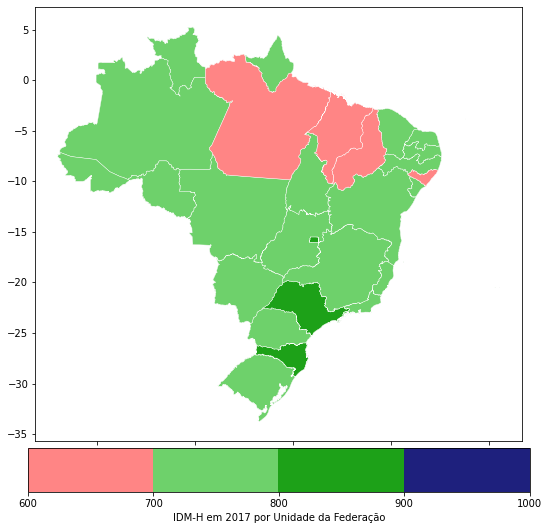

In [ ]:
# tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9)) 
# cor do fundo do mapa
ax.set_facecolor('#ffffff') 

# código da legenda
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="10%", pad=0.1) # localização da barrinha e legenda

# código das cores personalizadas da barra da legenda
# (as cores podem ser padrão do matplotlib ou em hex)
# (cria uma escala de cores entre as cores escolhidas)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ff8585", "#6ed16b", "#1da118", "#1e207d"])

# define os limites da barra da legenda e normaliza os valores
# (o cmap.N faz com que todas as cores da escala apareçam)
norm = matplotlib.colors.BoundaryNorm([600,700,800,900,1000], cmap.N)

# plot entre geodataframes (o 'brasil' e o criado com os dataframes ('gdf'))

# (plot com o geodataframe base ('brasil'))
brasil.plot(ax=ax, facecolor='#d4d4d4', edgecolor='#ffffff', linewidth=0.4)

# (plot com o geodataframes com informações ('gdf'))
gdf.plot(column='IDH-M 2017', ax=ax, legend=True, cax=cax, cmap=cmap, edgecolor='#ffffff', linewidth=0.4,
        legend_kwds={'label': "IDM-H em 2017 por Unidade da Federação", 'orientation': "horizontal"},
         norm=norm)

# 4. Exercício para 18/10:

# - Gerar os mapas com as informações de Renda, Longevidade e Educação.

- Observação: na tabela "Renda" os valores estão separados com ponto, e não vírgula. Usar a opção "thousands" no método "read_html", ao carregar a tabela para o dataframe

# Wikipedia RENDA

In [ ]:
# link sobre a renda do Brasil

req = requests.get('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_renda_per_capita').text

In [ ]:
# criação do soup

soup = BeautifulSoup(req, 'html.parser')

# visualização
#print(soup.prettify())

In [ ]:
# extração da primeira tabela da página do soup
# parâmetro '[0]'

table = soup.find_all('table', class_='wikitable')[0] 

 #print(table.prettify())

In [ ]:
#Conversão da tabela para DF usando parametro de thousands = "."
df = pd.read_html(str(table), thousands='.')
print(df)

[    Posição em 2019  ... Rendimentoper capita2018em R$[2]
0                 1  ...                             2460
1                 2  ...                             1898
2                 3  ...                             1689
3                 4  ...                             1705
4                 5  ...                             1660
5                 6  ...                             1607
6                 7  ...                             1439
7                 8  ...                             1295
8                 9  ...                             1386
9                10  ...                             1322
10               11  ...                             1323
11               12  ...                             1113
12               13  ...                              956
13               14  ...                             1045
14               15  ...                             1204
15               16  ...                              906
16           

In [ ]:
df_1 = df[0].copy()
df_1

,Posição em 2019,Unidade Federativa,Rendimentoper capita2019em R$[1],Rendimentoper capita2018em R$[2]
0,1,Distrito Federal,2685,2460
1,2,São Paulo,1945,1898
2,3,Rio de Janeiro,1881,1689
3,4,Rio Grande do Sul,1842,1705
4,5,Santa Catarina,1769,1660
5,6,Paraná,1620,1607
6,7,Mato Grosso do Sul,1514,1439
7,8,Espírito Santo,1476,1295
8,9,Mato Grosso,1402,1386
9,10,Minas Gerais,1357,1322


In [ ]:
#Exclusão da coluna 0 (Posição em 2019)
df_1 = df_1.drop(df_1.columns[[0]], axis=1)
df_1

,Unidade Federativa,Rendimentoper capita2019em R$[1],Rendimentoper capita2018em R$[2]
0,Distrito Federal,2685,2460
1,São Paulo,1945,1898
2,Rio de Janeiro,1881,1689
3,Rio Grande do Sul,1842,1705
4,Santa Catarina,1769,1660
5,Paraná,1620,1607
6,Mato Grosso do Sul,1514,1439
7,Espírito Santo,1476,1295
8,Mato Grosso,1402,1386
9,Minas Gerais,1357,1322


In [ ]:
# Alterando o nome das colunas
df_1.columns = ['UF', 'Renda em 2019', 'Renda em 2018']
df_1

,UF,Renda em 2019,Renda em 2018
0,Distrito Federal,2685,2460
1,São Paulo,1945,1898
2,Rio de Janeiro,1881,1689
3,Rio Grande do Sul,1842,1705
4,Santa Catarina,1769,1660
5,Paraná,1620,1607
6,Mato Grosso do Sul,1514,1439
7,Espírito Santo,1476,1295
8,Mato Grosso,1402,1386
9,Minas Gerais,1357,1322


In [ ]:
# Coluna 'UF' em maiúsculas, igual ao geodataframe
df_1['UF'] = df_1['UF'].str.upper()
df_1

,UF,Renda em 2019,Renda em 2018
0,DISTRITO FEDERAL,2685,2460
1,SÃO PAULO,1945,1898
2,RIO DE JANEIRO,1881,1689
3,RIO GRANDE DO SUL,1842,1705
4,SANTA CATARINA,1769,1660
5,PARANÁ,1620,1607
6,MATO GROSSO DO SUL,1514,1439
7,ESPÍRITO SANTO,1476,1295
8,MATO GROSSO,1402,1386
9,MINAS GERAIS,1357,1322


In [ ]:
# Importando o geodataframe com o mapa do Brasil dividido em estados
brasil = geopandas.read_file("BRUFE250GC_SIR.shp")
brasil

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [ ]:
# Renomeando as colunas do geodataframe 'Brasil', para o merge a seguir
brasil.columns = ['UF', 'Região', 'CD_GEOCUF', 'geometry']
brasil

,UF,Região,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [ ]:
# União dos dados extraídos da Wikipedia e o geodataframe 'Brasil'
df_geo = pd.merge(df_1, brasil[['UF', 'Região', 'geometry']], on='UF')
df_geo

,UF,Renda em 2019,Renda em 2018,Região,geometry
0,DISTRITO FEDERAL,2685,2460,CENTRO-OESTE,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
1,SÃO PAULO,1945,1898,SUDESTE,"MULTIPOLYGON (((-48.00174 -25.24890, -48.00195..."
2,RIO DE JANEIRO,1881,1689,SUDESTE,"MULTIPOLYGON (((-44.71892 -23.35908, -44.71956..."
3,RIO GRANDE DO SUL,1842,1705,SUL,"POLYGON ((-53.03183 -27.15947, -53.02991 -27.1..."
4,SANTA CATARINA,1769,1660,SUL,"MULTIPOLYGON (((-48.82145 -28.61110, -48.82159..."
5,PARANÁ,1620,1607,SUL,"POLYGON ((-52.05188 -22.53933, -52.04607 -22.5..."
6,MATO GROSSO DO SUL,1514,1439,CENTRO-OESTE,"POLYGON ((-56.10370 -17.17354, -56.10209 -17.1..."
7,ESPÍRITO SANTO,1476,1295,SUDESTE,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
8,MATO GROSSO,1402,1386,CENTRO-OESTE,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."
9,MINAS GERAIS,1357,1322,SUDESTE,"POLYGON ((-44.20984 -14.24460, -44.20912 -14.2..."


In [ ]:
# Conversão do dataframe anterior em geodataframe (para plotagem
# com o mapa do Brasil (o geodataframe 'brasil'))
gdf = geopandas.GeoDataFrame(df_geo)

gdf

,UF,Renda em 2019,Renda em 2018,Região,geometry
0,DISTRITO FEDERAL,2685,2460,CENTRO-OESTE,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
1,SÃO PAULO,1945,1898,SUDESTE,"MULTIPOLYGON (((-48.00174 -25.24890, -48.00195..."
2,RIO DE JANEIRO,1881,1689,SUDESTE,"MULTIPOLYGON (((-44.71892 -23.35908, -44.71956..."
3,RIO GRANDE DO SUL,1842,1705,SUL,"POLYGON ((-53.03183 -27.15947, -53.02991 -27.1..."
4,SANTA CATARINA,1769,1660,SUL,"MULTIPOLYGON (((-48.82145 -28.61110, -48.82159..."
5,PARANÁ,1620,1607,SUL,"POLYGON ((-52.05188 -22.53933, -52.04607 -22.5..."
6,MATO GROSSO DO SUL,1514,1439,CENTRO-OESTE,"POLYGON ((-56.10370 -17.17354, -56.10209 -17.1..."
7,ESPÍRITO SANTO,1476,1295,SUDESTE,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
8,MATO GROSSO,1402,1386,CENTRO-OESTE,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."
9,MINAS GERAIS,1357,1322,SUDESTE,"POLYGON ((-44.20984 -14.24460, -44.20912 -14.2..."


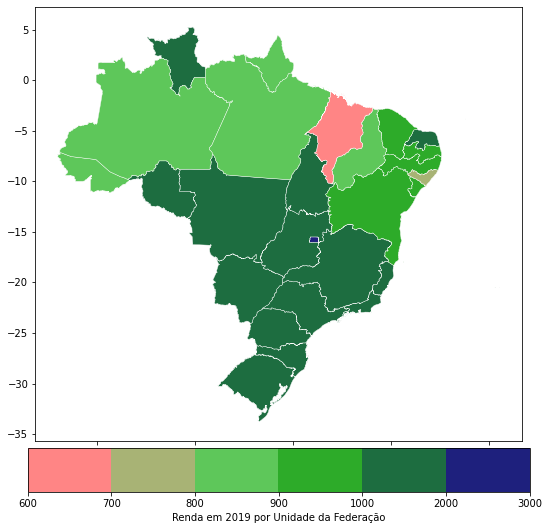

In [ ]:
# tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9)) 
# cor do fundo do mapa
ax.set_facecolor('#ffffff') 

# código da legenda
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="10%", pad=0.1) # localização da barrinha e legenda

# código das cores personalizadas da barra da legenda
# (as cores podem ser padrão do matplotlib ou em hex)
# (cria uma escala de cores entre as cores escolhidas)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ff8585", "#6ed16b", "#1da118", "#1e207d"])

# define os limites da barra da legenda e normaliza os valores
# (o cmap.N faz com que todas as cores da escala apareçam)
norm = matplotlib.colors.BoundaryNorm([650,750,850,950,1000,1500,3000], cmap.N)

# plot entre geodataframes (o 'brasil' e o criado com os dataframes ('gdf'))

# (plot com o geodataframe base ('brasil'))
brasil.plot(ax=ax, facecolor='#d4d4d4', edgecolor='#ffffff', linewidth=0.4)

# (plot com o geodataframes com informações ('gdf'))
gdf.plot(column='Renda em 2019', ax=ax, legend=True, cax=cax, cmap=cmap, edgecolor='#ffffff', linewidth=0.4,
        legend_kwds={'label': "Renda em 2019 por Unidade da Federação", 'orientation': "horizontal"},
         norm=norm)

# Wikipedia Longevidade


In [ ]:
req = requests.get('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_expectativa_de_vida').text

In [ ]:
# criação do soup

soup = BeautifulSoup(req, 'html.parser')

In [ ]:
# extração da primeira tabela da página do soup
# parâmetro '[0]'

table = soup.find_all('table', class_='wikitable')[0] 

In [ ]:
# conversão da tabela em uma lista de dataframes
# pd.read_html - Read HTML tables into a list of DataFrame objects (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)

df = pd.read_html(str(table).replace('anos', '').replace(',', '.'))
print(df)

[     Unidade federativa  Ambos os sexos[1]  Pos.  ... Pos..1  Mulheres[1]  Pos..2
0        Santa Catarina               79.4     1  ...      1         82.7       1
1        Espírito Santo               78.5     2  ...      4         82.5       2
2      Distrito Federal               78.4     3  ...      3         81.7       3
3             São Paulo               78.4     4  ...      2         81.3       4
4     Rio Grande do Sul               78.0     5  ...      5         81.3       5
5          Minas Gerais               77.5     6  ...      6         80.4       7
6                Paraná               77.4     7  ...      7         80.8       6
7        Rio de Janeiro               76.5     8  ...      8         79.7       9
8   Rio Grande do Norte               76.0     9  ...     10         80.0       8
9    Mato Grosso do Sul               75.8    10  ...      9         79.5      10
10          Mato Grosso               74.5    11  ...     12         78.1      13
11             

In [ ]:
df_1 = df[0].copy()
df_1

,Unidade federativa,Ambos os sexos[1],Pos.,País comparável[7],Homens[1],Pos..1,Mulheres[1],Pos..2
0,Santa Catarina,79.4,1,Brunei,76.1,1,82.7,1
1,Espírito Santo,78.5,2,Curação,74.6,4,82.5,2
2,Distrito Federal,78.4,3,Albânia,74.7,3,81.7,3
3,São Paulo,78.4,4,Albânia,75.3,2,81.3,4
4,Rio Grande do Sul,78.0,5,Panamá,74.6,5,81.3,5
5,Minas Gerais,77.5,6,Uruguai,74.6,6,80.4,7
6,Paraná,77.4,7,Maldivas,74.0,7,80.8,6
7,Rio de Janeiro,76.5,8,Hungria,73.0,8,79.7,9
8,Rio Grande do Norte,76.0,9,Aruba,72.0,10,80.0,8
9,Mato Grosso do Sul,75.8,10,Macedônia,72.4,9,79.5,10


In [ ]:
df_1 = df_1.drop(df_1.columns[[2,3,5,7]], axis=1)
df_1

,Unidade federativa,Ambos os sexos[1],Homens[1],Mulheres[1]
0,Santa Catarina,79.4,76.1,82.7
1,Espírito Santo,78.5,74.6,82.5
2,Distrito Federal,78.4,74.7,81.7
3,São Paulo,78.4,75.3,81.3
4,Rio Grande do Sul,78.0,74.6,81.3
5,Minas Gerais,77.5,74.6,80.4
6,Paraná,77.4,74.0,80.8
7,Rio de Janeiro,76.5,73.0,79.7
8,Rio Grande do Norte,76.0,72.0,80.0
9,Mato Grosso do Sul,75.8,72.4,79.5


In [ ]:
# Alterando o nome das colunas

df_1.columns = ['UF', 'Ambos os sexos', 'Homem', 'Mulher']
df_1

,UF,Ambos os sexos,Homem,Mulher
0,Santa Catarina,79.4,76.1,82.7
1,Espírito Santo,78.5,74.6,82.5
2,Distrito Federal,78.4,74.7,81.7
3,São Paulo,78.4,75.3,81.3
4,Rio Grande do Sul,78.0,74.6,81.3
5,Minas Gerais,77.5,74.6,80.4
6,Paraná,77.4,74.0,80.8
7,Rio de Janeiro,76.5,73.0,79.7
8,Rio Grande do Norte,76.0,72.0,80.0
9,Mato Grosso do Sul,75.8,72.4,79.5


In [ ]:
# Coluna 'UF' em maiúsculas, igual ao geodataframe

df_1['UF'] = df_1['UF'].str.upper()
df_1

,UF,Ambos os sexos,Homem,Mulher
0,SANTA CATARINA,79.4,76.1,82.7
1,ESPÍRITO SANTO,78.5,74.6,82.5
2,DISTRITO FEDERAL,78.4,74.7,81.7
3,SÃO PAULO,78.4,75.3,81.3
4,RIO GRANDE DO SUL,78.0,74.6,81.3
5,MINAS GERAIS,77.5,74.6,80.4
6,PARANÁ,77.4,74.0,80.8
7,RIO DE JANEIRO,76.5,73.0,79.7
8,RIO GRANDE DO NORTE,76.0,72.0,80.0
9,MATO GROSSO DO SUL,75.8,72.4,79.5


In [ ]:
# Importando o geodataframe com o mapa do Brasil dividido em estados

# SHG -  dados geoespaciais em forma de vetor usado por Sistemas de Informações Geográficas também conhecidos como SIG.
# Foi desenvolvido e regulamentado pela ESRI como uma especificação aberta para interoperabilidade por dados entre os softwares de Esri e de outros fornecedores

# Mais informações sobre polígonos e multipolígonos: 
# https://gis.stackexchange.com/questions/225368/understanding-difference-between-polygon-and-multipolygon-for-shapefiles-in-qgis/225373

# São indispensáveis os arquivos DBF e SHX na mesma pasta que o SHP

brasil = geopandas.read_file("BRUFE250GC_SIR.shp")
brasil

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [ ]:
# Renomeando as colunas do geodataframe 'Brasil', para o merge a seguir

brasil.columns = ['UF', 'Região', 'CD_GEOCUF', 'geometry']
brasil

,UF,Região,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [ ]:
# União dos dados extraídos da Wikipedia e o geodataframe 'Brasil'

df_geo = pd.merge(df_1, brasil[['UF', 'Região', 'geometry']], on='UF')
df_geo

,UF,Ambos os sexos,Homem,Mulher,Região,geometry
0,SANTA CATARINA,79.4,76.1,82.7,SUL,"MULTIPOLYGON (((-48.82145 -28.61110, -48.82159..."
1,ESPÍRITO SANTO,78.5,74.6,82.5,SUDESTE,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
2,DISTRITO FEDERAL,78.4,74.7,81.7,CENTRO-OESTE,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
3,SÃO PAULO,78.4,75.3,81.3,SUDESTE,"MULTIPOLYGON (((-48.00174 -25.24890, -48.00195..."
4,RIO GRANDE DO SUL,78.0,74.6,81.3,SUL,"POLYGON ((-53.03183 -27.15947, -53.02991 -27.1..."
5,MINAS GERAIS,77.5,74.6,80.4,SUDESTE,"POLYGON ((-44.20984 -14.24460, -44.20912 -14.2..."
6,PARANÁ,77.4,74.0,80.8,SUL,"POLYGON ((-52.05188 -22.53933, -52.04607 -22.5..."
7,RIO DE JANEIRO,76.5,73.0,79.7,SUDESTE,"MULTIPOLYGON (((-44.71892 -23.35908, -44.71956..."
8,RIO GRANDE DO NORTE,76.0,72.0,80.0,NORDESTE,"POLYGON ((-37.25329 -4.83156, -37.25326 -4.831..."
9,MATO GROSSO DO SUL,75.8,72.4,79.5,CENTRO-OESTE,"POLYGON ((-56.10370 -17.17354, -56.10209 -17.1..."


In [ ]:
gdf = geopandas.GeoDataFrame(df_geo)

gdf

,UF,Ambos os sexos,Homem,Mulher,Região,geometry
0,SANTA CATARINA,79.4,76.1,82.7,SUL,"MULTIPOLYGON (((-48.82145 -28.61110, -48.82159..."
1,ESPÍRITO SANTO,78.5,74.6,82.5,SUDESTE,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
2,DISTRITO FEDERAL,78.4,74.7,81.7,CENTRO-OESTE,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
3,SÃO PAULO,78.4,75.3,81.3,SUDESTE,"MULTIPOLYGON (((-48.00174 -25.24890, -48.00195..."
4,RIO GRANDE DO SUL,78.0,74.6,81.3,SUL,"POLYGON ((-53.03183 -27.15947, -53.02991 -27.1..."
5,MINAS GERAIS,77.5,74.6,80.4,SUDESTE,"POLYGON ((-44.20984 -14.24460, -44.20912 -14.2..."
6,PARANÁ,77.4,74.0,80.8,SUL,"POLYGON ((-52.05188 -22.53933, -52.04607 -22.5..."
7,RIO DE JANEIRO,76.5,73.0,79.7,SUDESTE,"MULTIPOLYGON (((-44.71892 -23.35908, -44.71956..."
8,RIO GRANDE DO NORTE,76.0,72.0,80.0,NORDESTE,"POLYGON ((-37.25329 -4.83156, -37.25326 -4.831..."
9,MATO GROSSO DO SUL,75.8,72.4,79.5,CENTRO-OESTE,"POLYGON ((-56.10370 -17.17354, -56.10209 -17.1..."


# MAPA Expectativa Ambos os Sexos

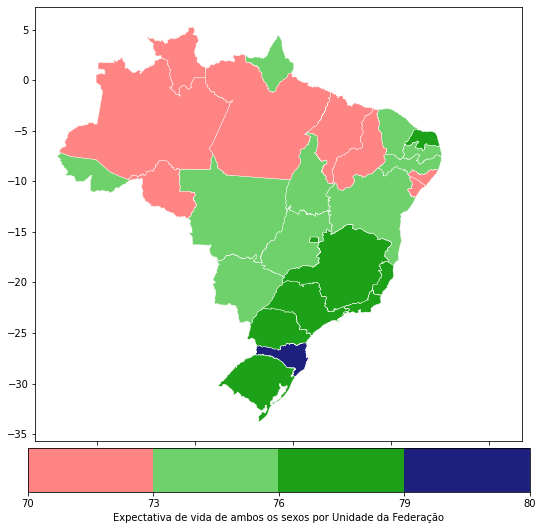

In [ ]:
# tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9)) 
# cor do fundo do mapa
ax.set_facecolor('#ffffff') 

# código da legenda
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="10%", pad=0.1) # localização da barrinha e legenda

# código das cores personalizadas da barra da legenda
# (as cores podem ser padrão do matplotlib ou em hex)
# (cria uma escala de cores entre as cores escolhidas)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ff8585", "#6ed16b", "#1da118", "#1e207d"])

# define os limites da barra da legenda e normaliza os valores
# (o cmap.N faz com que todas as cores da escala apareçam)
norm = matplotlib.colors.BoundaryNorm([70,73,76,79,80], cmap.N)

# plot entre geodataframes (o 'brasil' e o criado com os dataframes ('gdf'))

# (plot com o geodataframe base ('brasil'))
brasil.plot(ax=ax, facecolor='#d4d4d4', edgecolor='#ffffff', linewidth=0.4)

# (plot com o geodataframes com informações ('gdf'))
gdf.plot(column='Ambos os sexos', ax=ax, legend=True, cax=cax, cmap=cmap, edgecolor='#ffffff', linewidth=0.4,
        legend_kwds={'label': "Expectativa de vida de ambos os sexos por Unidade da Federação", 'orientation': "horizontal"},
         norm=norm)

# Wikipedia EDUCAÇÃO

In [ ]:
req = requests.get('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_alfabetiza%C3%A7%C3%A3o').text

In [ ]:
# criação do soup

soup = BeautifulSoup(req, 'html.parser')

In [ ]:
# extração da primeira tabela da página do soup
# parâmetro '[0]'

table = soup.find_all('table', class_='wikitable')[0] 

In [ ]:
df = pd.read_html(str(table).replace('%','').replace(',', '.'))
print(df)

[    Posição  ...      País comparável[7]
0         1  ...                 Albânia
1         2  ...                  Israel
2         3  ...               Singapura
3         4  ...               Singapura
4         5  ...               Singapura
5         6  ...                  Panamá
6         7  ...                  Vietnã
7         8  ...                  Vietnã
8         9  ...                    Peru
9        10  ...                   Malta
10       11  ...                   Malta
11       12  ...                   Malta
12       13  ...                   Malta
13       14  ...  Emirados Árabes Unidos
14       15  ...                   Catar
15       16  ...                 Namíbia
16       17  ...                   Líbia
17       18  ...             El Salvador
18       19  ...             El Salvador
19       20  ...                Honduras
20       21  ...                Zimbabwe
21       22  ...                   Síria
22       23  ...                   Síria
23       24  ..

In [ ]:
df_1 = df[0].copy()
df_1

,Posição,Unidade federativa,Taxa dealfabetização2019 ()[6],País comparável[7]
0,1,Rio de Janeiro,97.9,Albânia
1,2,Santa Catarina,97.7,Israel
2,3,São Paulo,97.4,Singapura
3,4,Rio Grande do Sul,97.4,Singapura
4,5,Distrito Federal,97.3,Singapura
5,6,Paraná,95.4,Panamá
6,7,Roraima,95.0,Vietnã
7,8,Mato Grosso do Sul,94.9,Vietnã
8,9,Goiás,94.9,Peru
9,10,Espírito Santo,94.7,Malta


In [ ]:
df_1 = df_1.drop(df_1.columns[[0,3]], axis=1)
df_1

,Unidade federativa,Taxa dealfabetização2019 ()[6]
0,Rio de Janeiro,97.9
1,Santa Catarina,97.7
2,São Paulo,97.4
3,Rio Grande do Sul,97.4
4,Distrito Federal,97.3
5,Paraná,95.4
6,Roraima,95.0
7,Mato Grosso do Sul,94.9
8,Goiás,94.9
9,Espírito Santo,94.7


In [ ]:
# Alterando o nome das colunas

df_1.columns = ['UF', 'alfabetização']
df_1

,UF,alfabetização
0,Rio de Janeiro,97.9
1,Santa Catarina,97.7
2,São Paulo,97.4
3,Rio Grande do Sul,97.4
4,Distrito Federal,97.3
5,Paraná,95.4
6,Roraima,95.0
7,Mato Grosso do Sul,94.9
8,Goiás,94.9
9,Espírito Santo,94.7


In [ ]:
# Coluna 'UF' em maiúsculas, igual ao geodataframe

df_1['UF'] = df_1['UF'].str.upper()
df_1

,UF,alfabetização
0,RIO DE JANEIRO,97.9
1,SANTA CATARINA,97.7
2,SÃO PAULO,97.4
3,RIO GRANDE DO SUL,97.4
4,DISTRITO FEDERAL,97.3
5,PARANÁ,95.4
6,RORAIMA,95.0
7,MATO GROSSO DO SUL,94.9
8,GOIÁS,94.9
9,ESPÍRITO SANTO,94.7


In [ ]:
df_geo = pd.merge(df_1, brasil[['UF', 'Região', 'geometry']], on='UF')
df_geo

,UF,alfabetização,Região,geometry
0,RIO DE JANEIRO,97.9,SUDESTE,"MULTIPOLYGON (((-44.71892 -23.35908, -44.71956..."
1,SANTA CATARINA,97.7,SUL,"MULTIPOLYGON (((-48.82145 -28.61110, -48.82159..."
2,SÃO PAULO,97.4,SUDESTE,"MULTIPOLYGON (((-48.00174 -25.24890, -48.00195..."
3,RIO GRANDE DO SUL,97.4,SUL,"POLYGON ((-53.03183 -27.15947, -53.02991 -27.1..."
4,DISTRITO FEDERAL,97.3,CENTRO-OESTE,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
5,PARANÁ,95.4,SUL,"POLYGON ((-52.05188 -22.53933, -52.04607 -22.5..."
6,RORAIMA,95.0,NORTE,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
7,MATO GROSSO DO SUL,94.9,CENTRO-OESTE,"POLYGON ((-56.10370 -17.17354, -56.10209 -17.1..."
8,GOIÁS,94.9,CENTRO-OESTE,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
9,ESPÍRITO SANTO,94.7,SUDESTE,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."


In [ ]:
# Conversão do dataframe anterior em geodataframe (para plotagem
# com o mapa do Brasil (o geodataframe 'brasil'))
gdf = geopandas.GeoDataFrame(df_geo)

gdf

,UF,alfabetização,Região,geometry
0,RIO DE JANEIRO,97.9,SUDESTE,"MULTIPOLYGON (((-44.71892 -23.35908, -44.71956..."
1,SANTA CATARINA,97.7,SUL,"MULTIPOLYGON (((-48.82145 -28.61110, -48.82159..."
2,SÃO PAULO,97.4,SUDESTE,"MULTIPOLYGON (((-48.00174 -25.24890, -48.00195..."
3,RIO GRANDE DO SUL,97.4,SUL,"POLYGON ((-53.03183 -27.15947, -53.02991 -27.1..."
4,DISTRITO FEDERAL,97.3,CENTRO-OESTE,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
5,PARANÁ,95.4,SUL,"POLYGON ((-52.05188 -22.53933, -52.04607 -22.5..."
6,RORAIMA,95.0,NORTE,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
7,MATO GROSSO DO SUL,94.9,CENTRO-OESTE,"POLYGON ((-56.10370 -17.17354, -56.10209 -17.1..."
8,GOIÁS,94.9,CENTRO-OESTE,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
9,ESPÍRITO SANTO,94.7,SUDESTE,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."


# MAPA DE ALFABETIZAÇÃO

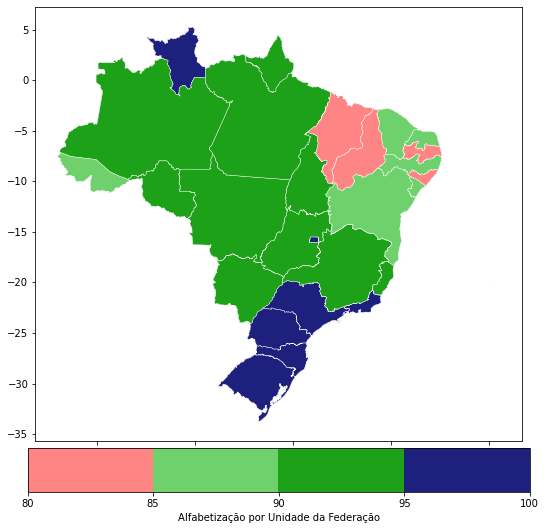

In [ ]:
# tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9)) 
# cor do fundo do mapa
ax.set_facecolor('#ffffff') 

# código da legenda
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="10%", pad=0.1) # localização da barrinha e legenda

# código das cores personalizadas da barra da legenda
# (as cores podem ser padrão do matplotlib ou em hex)
# (cria uma escala de cores entre as cores escolhidas)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ff8585", "#6ed16b", "#1da118", "#1e207d"])

# define os limites da barra da legenda e normaliza os valores
# (o cmap.N faz com que todas as cores da escala apareçam)
norm = matplotlib.colors.BoundaryNorm([81,86,95,100], cmap.N)

# plot entre geodataframes (o 'brasil' e o criado com os dataframes ('gdf'))

# (plot com o geodataframe base ('brasil'))
brasil.plot(ax=ax, facecolor='#d4d4d4', edgecolor='#ffffff', linewidth=0.4)

# (plot com o geodataframes com informações ('gdf'))
gdf.plot(column='alfabetização', ax=ax, legend=True, cax=cax, cmap=cmap, edgecolor='#ffffff', linewidth=0.4,
        legend_kwds={'label': "Alfabetização por Unidade da Federação", 'orientation': "horizontal"},
         norm=norm)